In [1]:
library(ggplot2)


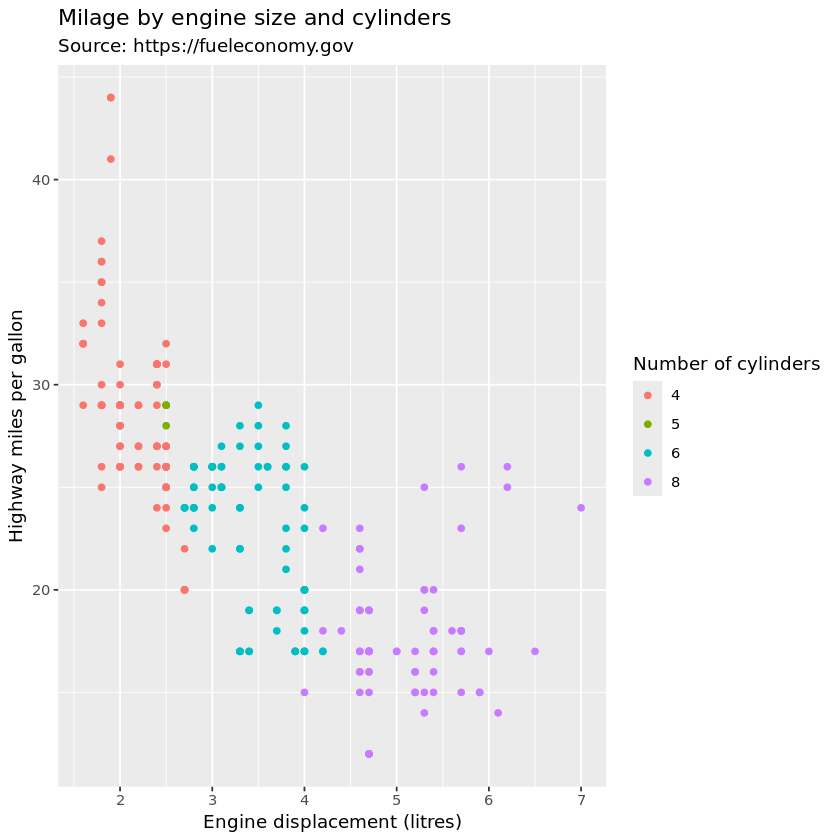

In [2]:
ggplot(mpg, aes(displ, hwy)) +
    geom_point(aes(colour = factor(cyl))) +
    labs(
        x = "Engine displacement (litres)",
        y = "Highway miles per gallon",
        colour = "Number of cylinders",
        title = "Milage by engine size and cylinders",
        subtitle = "Source: https://fueleconomy.gov",
    )

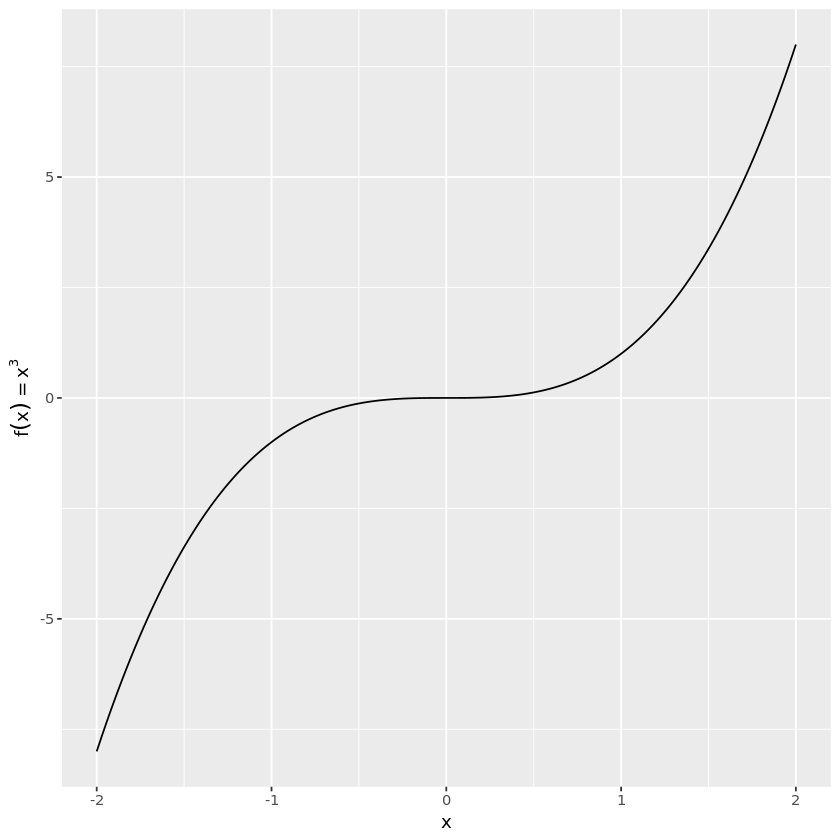

In [3]:
values <- seq(from = -2, to = 2, by = .01)
df <- data.frame(x = values, y = values ^ 3)
ggplot(df, aes(x, y)) + 
    geom_path() +
    labs(
        y = quote(f(x) == x^3),
    )

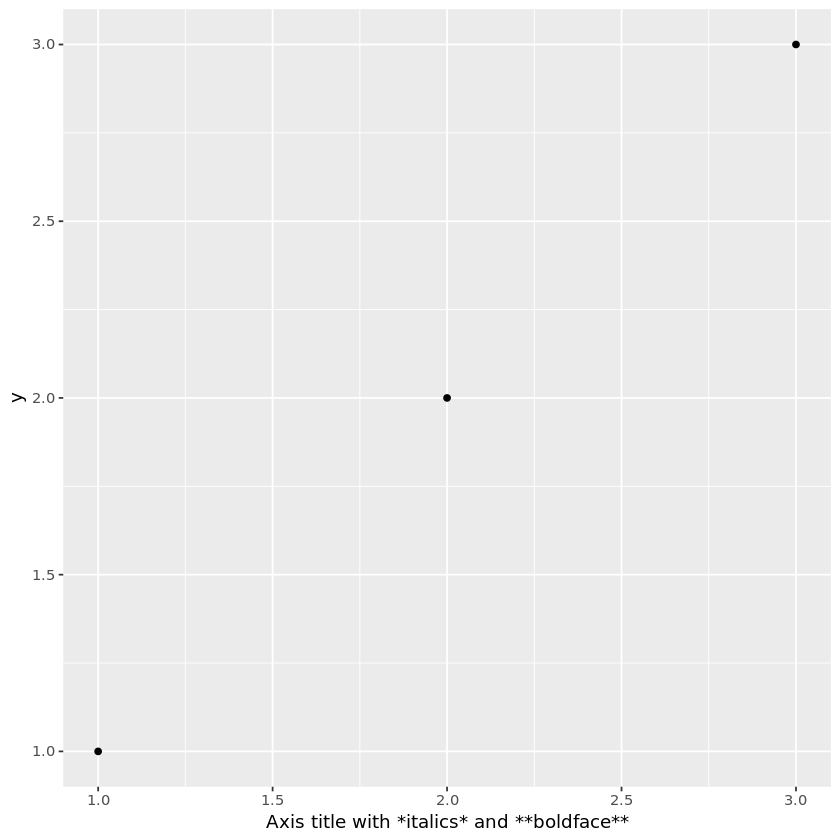

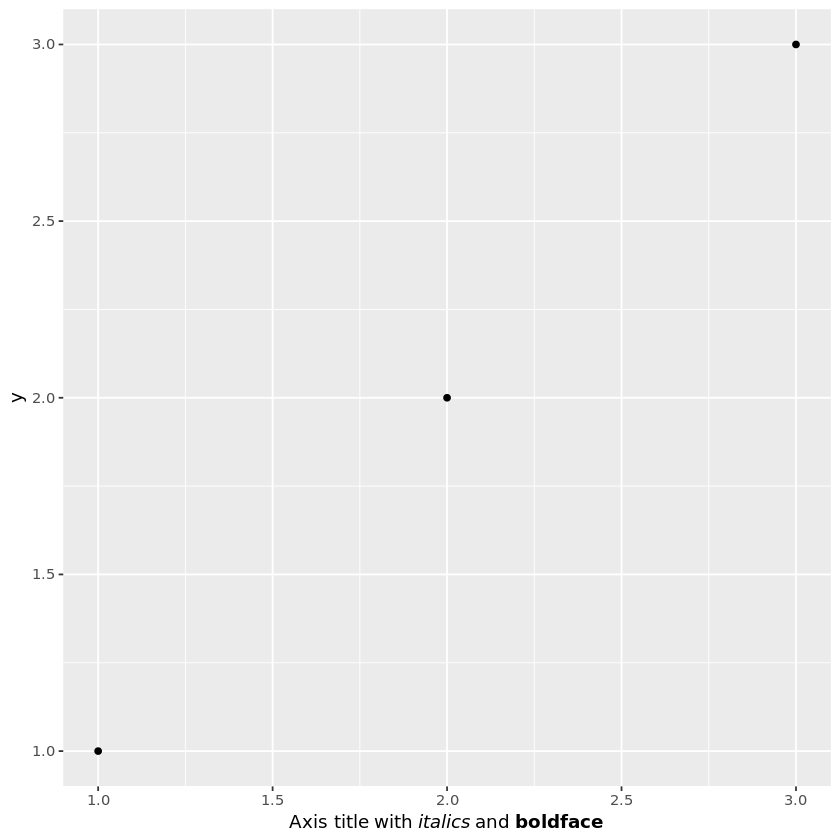

In [4]:
df <- data.frame(x = 1:3, y = 1:3)
base <- ggplot(df, aes(x,y)) +  
    geom_point() +
    labs(
        x = "Axis title with *italics* and **boldface**"
    )

base
base + theme(axis.title.x = ggtext::element_markdown())

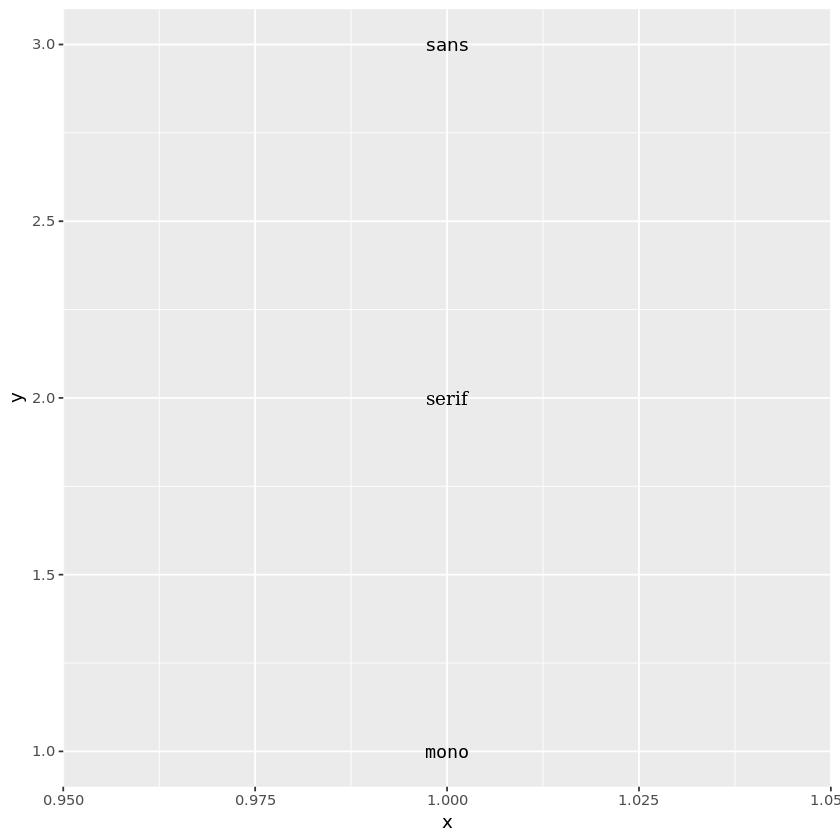

In [5]:
df <- data.frame(x = 1, y = 3:1, family = c("sans", "serif", "mono"))
ggplot(df, aes(x, y)) + 
  geom_text(aes(label = family, family = family))

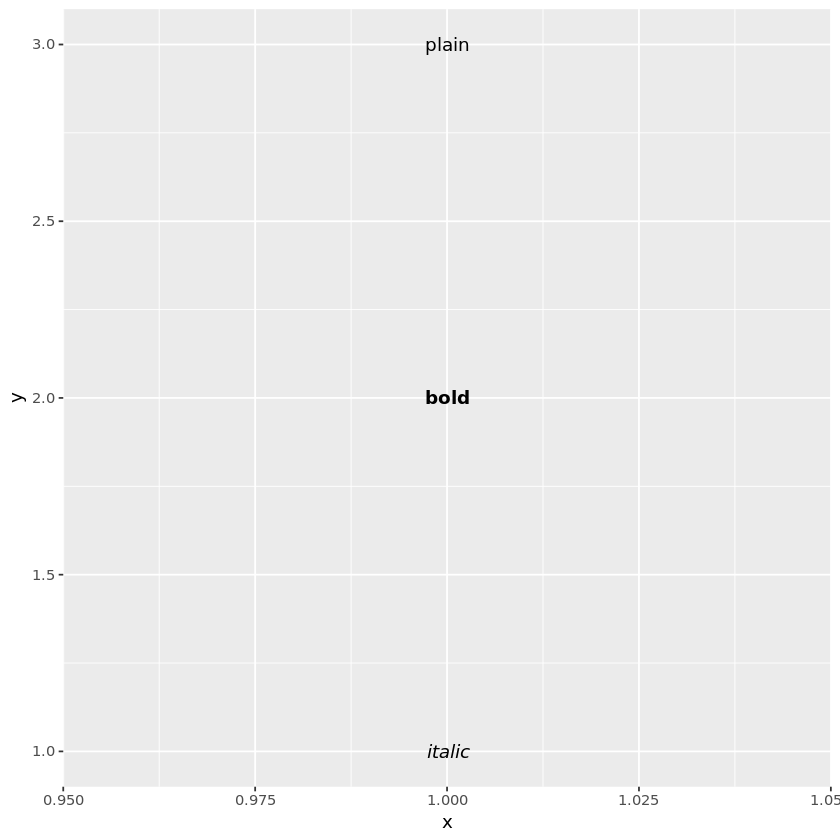

In [6]:
df <- data.frame(x = 1, y = 3:1, face = c("plain", "bold", "italic"))
ggplot(df, aes(x, y)) + 
  geom_text(aes(label = face, fontface = face))

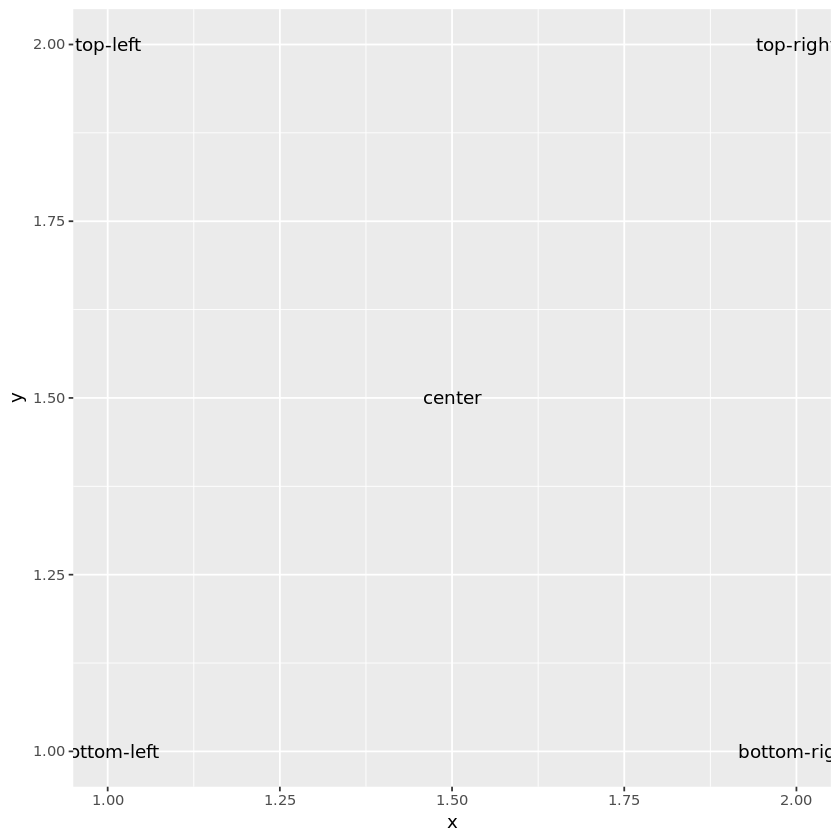

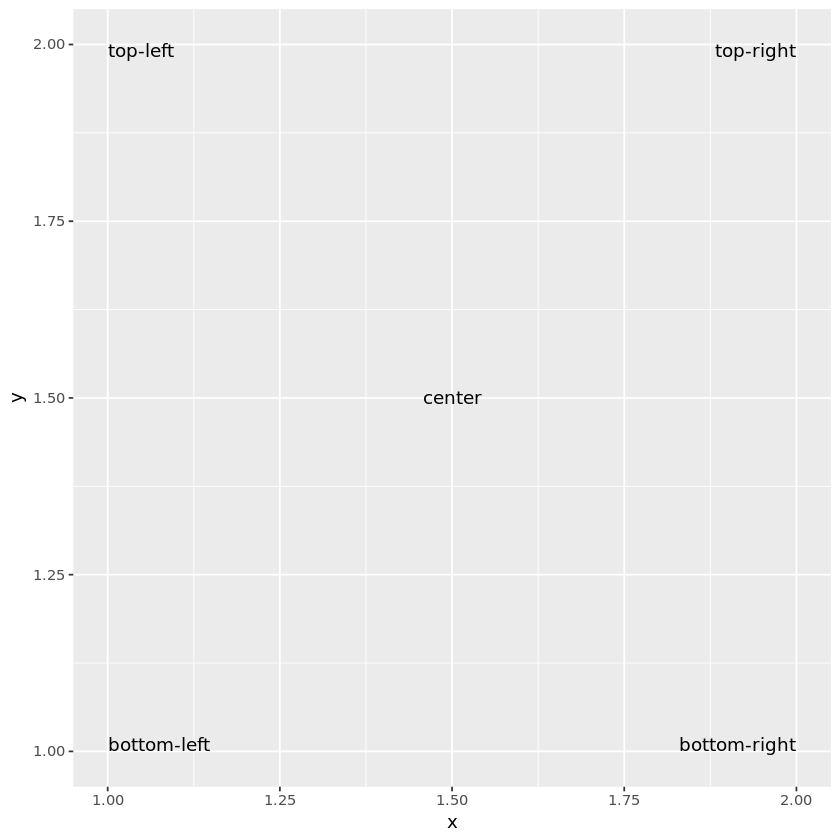

In [7]:
df <- data.frame(
  x = c(1, 1, 2, 2, 1.5),
  y = c(1, 2, 1, 2, 1.5),
  text = c(
    "bottom-left", "top-left",  
    "bottom-right", "top-right", "center"
  )
)
ggplot(df, aes(x, y)) +
  geom_text(aes(label = text))
ggplot(df, aes(x, y)) +
  geom_text(aes(label = text), vjust = "inward", hjust = "inward")

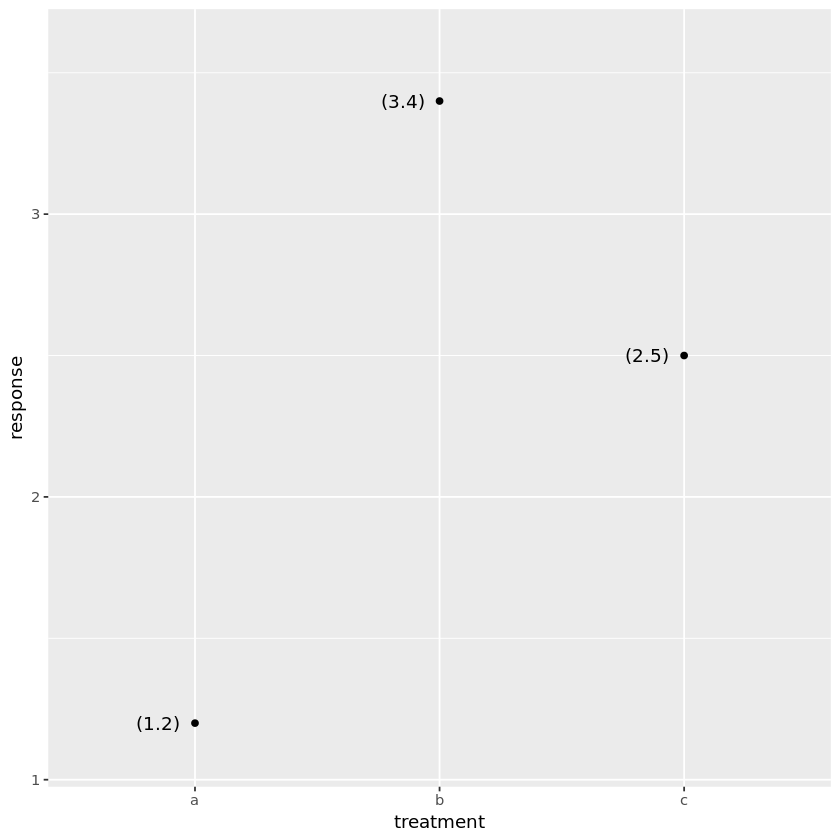

In [8]:
df <- data.frame(
  treatment = c("a", "b", "c"), 
  response = c(1.2, 3.4, 2.5)
)

ggplot(df, aes(treatment, response)) + 
  geom_point() + 
  geom_text(
    mapping = aes(label = paste0("(", response, ")")), 
    nudge_x = -0.15
  ) + 
  ylim(1.1, 3.6)

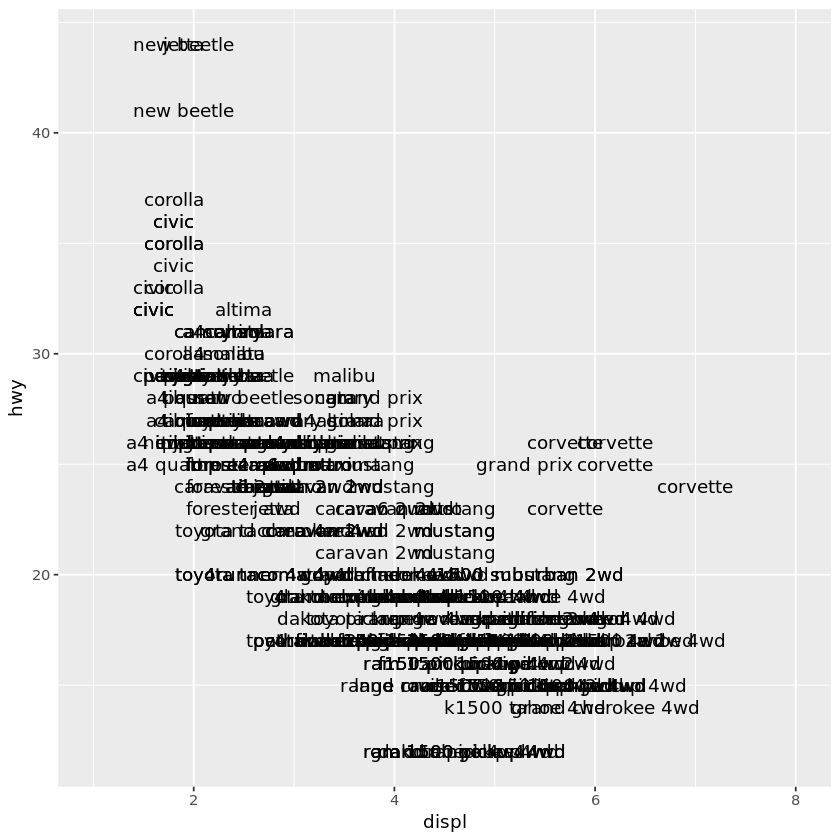

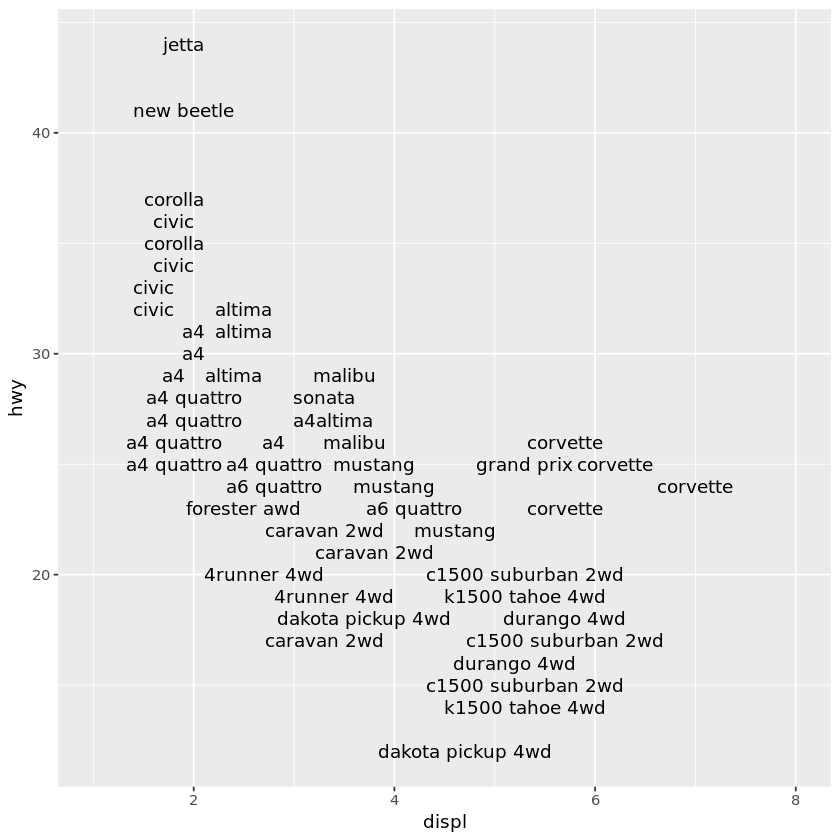

In [9]:
ggplot(mpg, aes(displ, hwy)) + 
  geom_text(aes(label = model)) + 
  xlim(1, 8)

ggplot(mpg, aes(displ, hwy)) + 
  geom_text(aes(label = model), check_overlap = TRUE) + 
  xlim(1, 8)

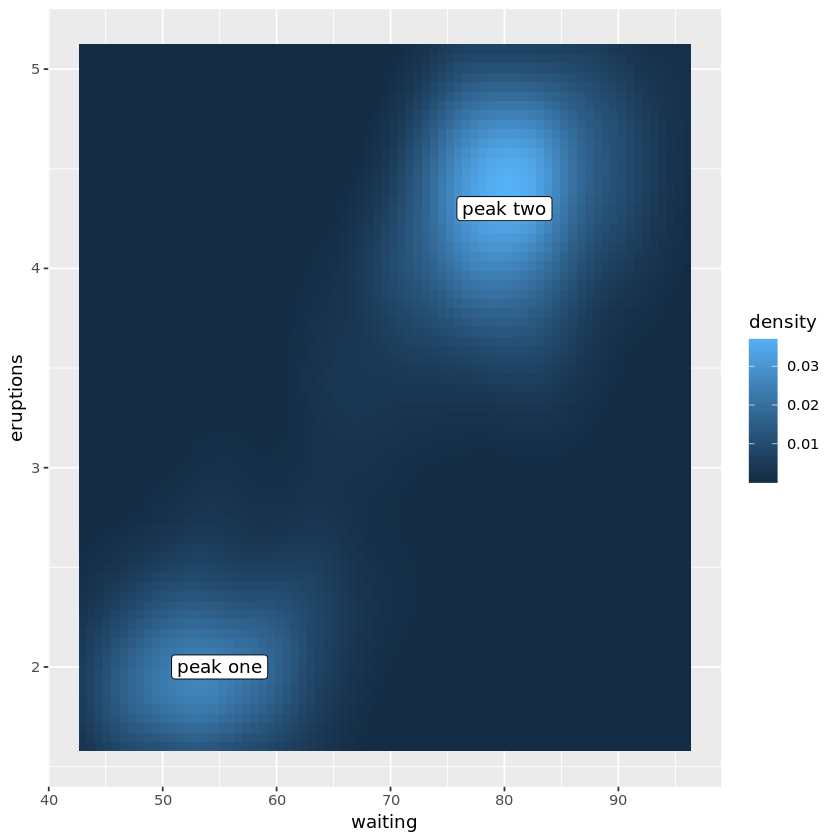

In [10]:
label <- data.frame(
  waiting = c(55, 80), 
  eruptions = c(2, 4.3), 
  label = c("peak one", "peak two")
)

ggplot(faithfuld, aes(waiting, eruptions)) +
  geom_tile(aes(fill = density)) + 
  geom_label(data = label, aes(label = label))

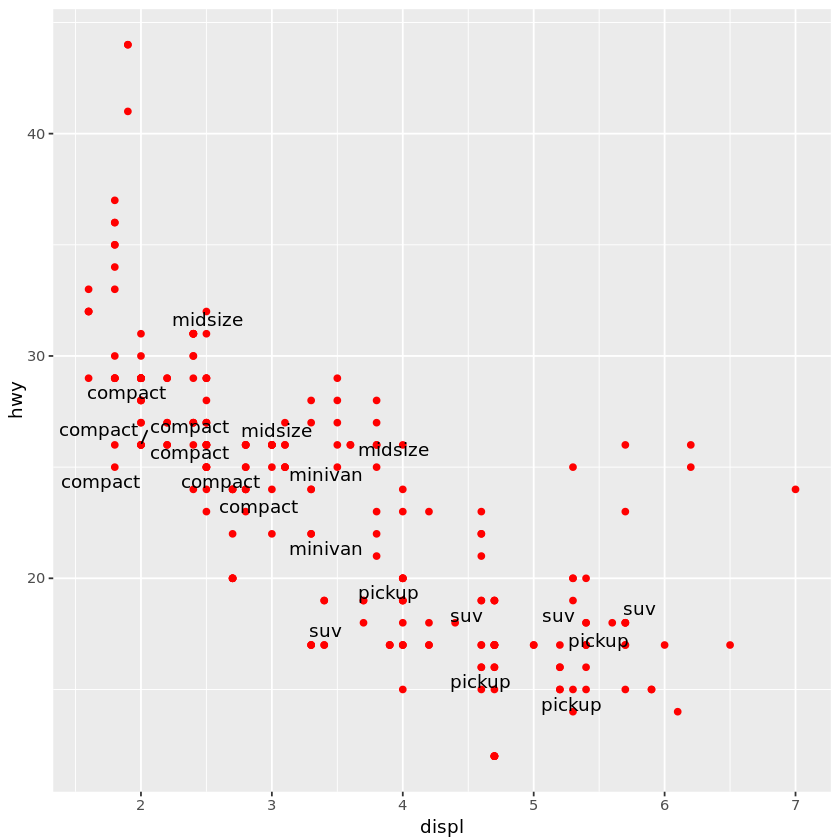

In [11]:
mini_mpg <- mpg[sample(nrow(mpg), 20), ]
ggplot(mpg, aes(displ, hwy)) + 
  geom_point(colour = "red") + 
  ggrepel::geom_text_repel(data = mini_mpg, aes(label = class))

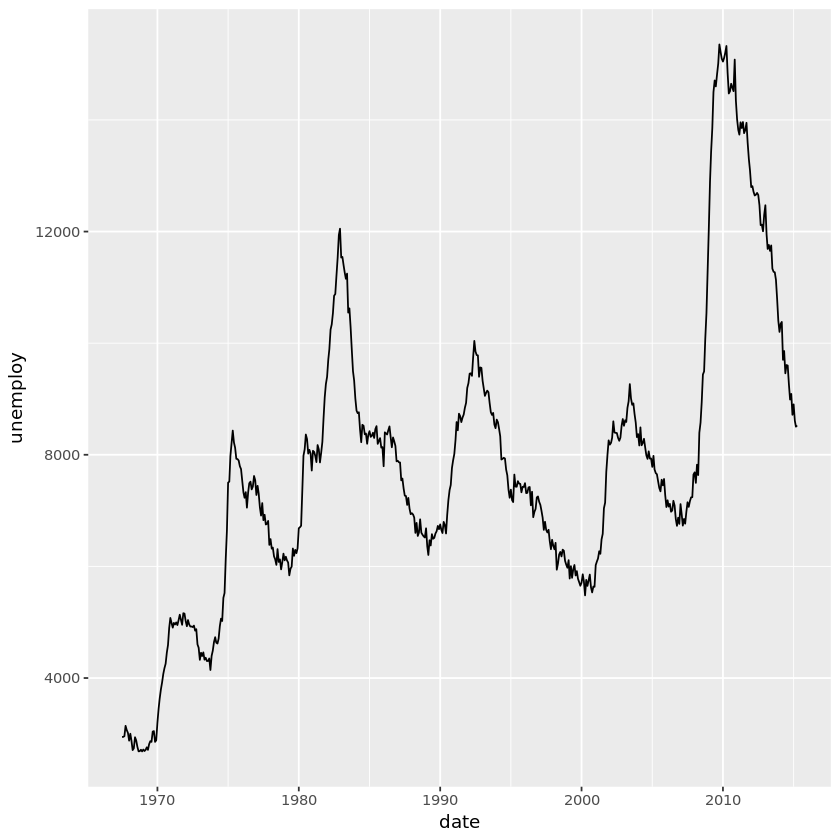

In [12]:
ggplot(economics, aes(date, unemploy)) +
    geom_line()

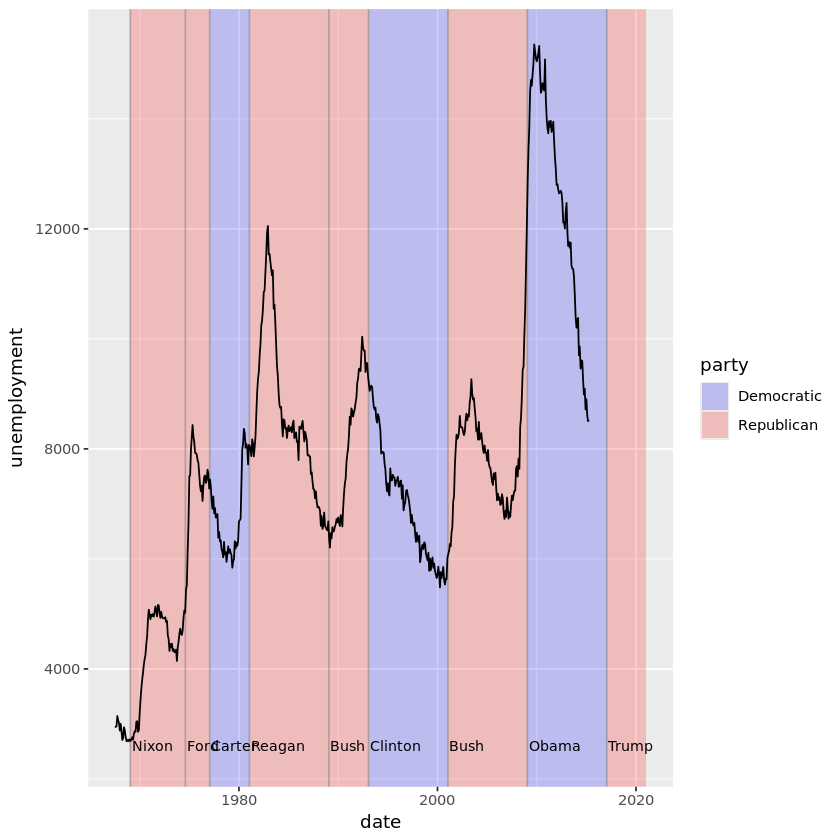

In [13]:
presidential <- subset(presidential, start > economics$date[1])

ggplot(economics) + 
  geom_rect(
    aes(xmin = start, xmax = end, fill = party), 
    ymin = -Inf, ymax = Inf, alpha = 0.2, 
    data = presidential
  ) + 
  geom_vline(
    aes(xintercept = as.numeric(start)), 
    data = presidential,
    colour = "grey50", alpha = 0.5
  ) + 
  geom_text(
    aes(x = start, y = 2500, label = name), 
    data = presidential, 
    size = 3, vjust = 0, hjust = 0, nudge_x = 50
  ) + 
  geom_line(aes(date, unemploy)) + 
  scale_fill_manual(values = c("blue", "red")) +
  xlab("date") + 
  ylab("unemployment")

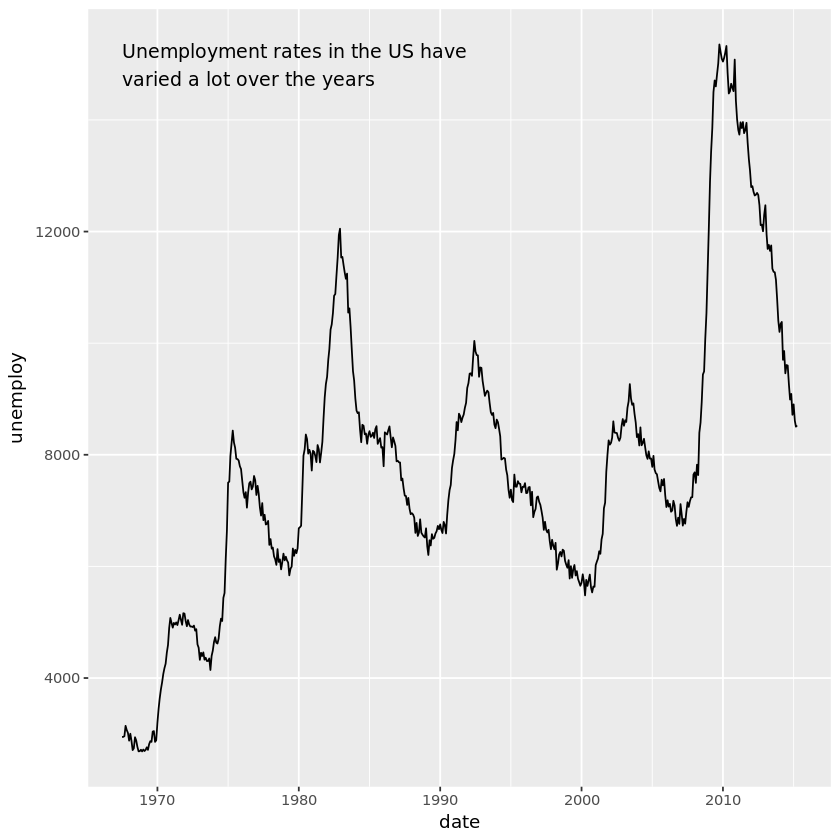

In [14]:
yrng <- range(economics$unemploy)
xrng <- range(economics$date)
caption <- paste(strwrap("Unemployment rates in the US have 
  varied a lot over the years", 40), collapse = "\n")

ggplot(economics, aes(date, unemploy)) + 
  geom_line() + 
  geom_text(
    aes(x, y, label = caption), 
    data = data.frame(x = xrng[1], y = yrng[2], caption = caption), 
    hjust = 0, vjust = 1, size = 4
  )

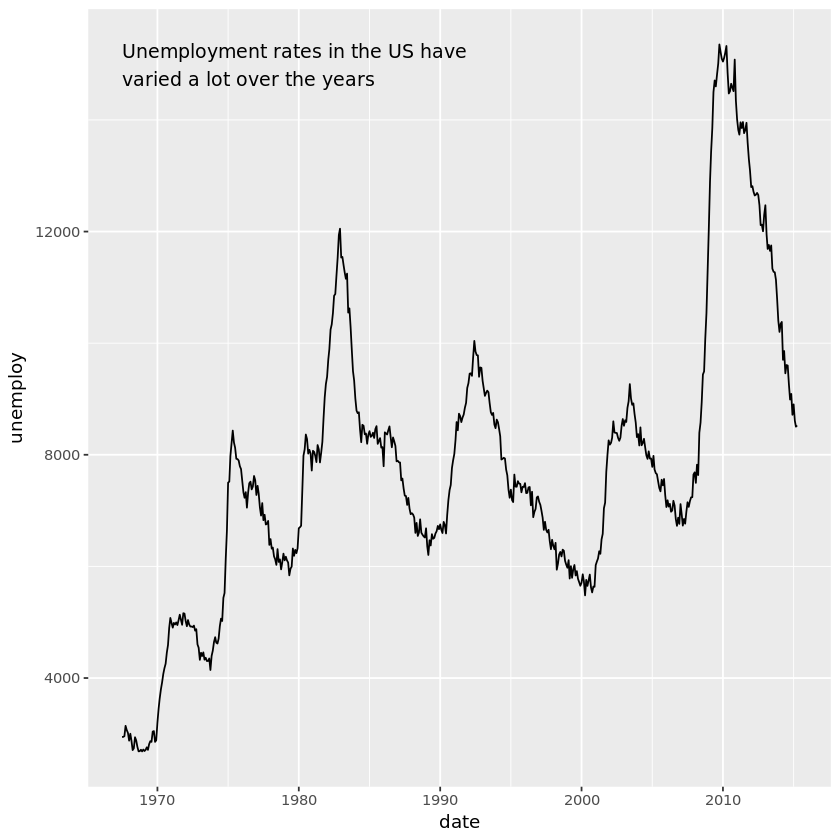

In [15]:
ggplot(economics, aes(date, unemploy)) + 
  geom_line() + 
  annotate(
    geom = "text", x = xrng[1], y = yrng[2], 
    label = caption, hjust = 0, vjust = 1, size = 4
  )

In [16]:
p <- ggplot(mpg, aes(displ, hwy)) +
  geom_point(
    data = filter(mpg, manufacturer == "subaru"), 
    colour = "orange",
    size = 3
  ) +
  geom_point() 

p + 
  annotate(geom = "point", x = 5.5, y = 40, colour = "orange", size = 3) + 
  annotate(geom = "point", x = 5.5, y = 40) + 
  annotate(geom = "text", x = 5.6, y = 40, label = "subaru", hjust = "left")

ERROR: Error in eval(expr, envir, enclos): object 'manufacturer' not found


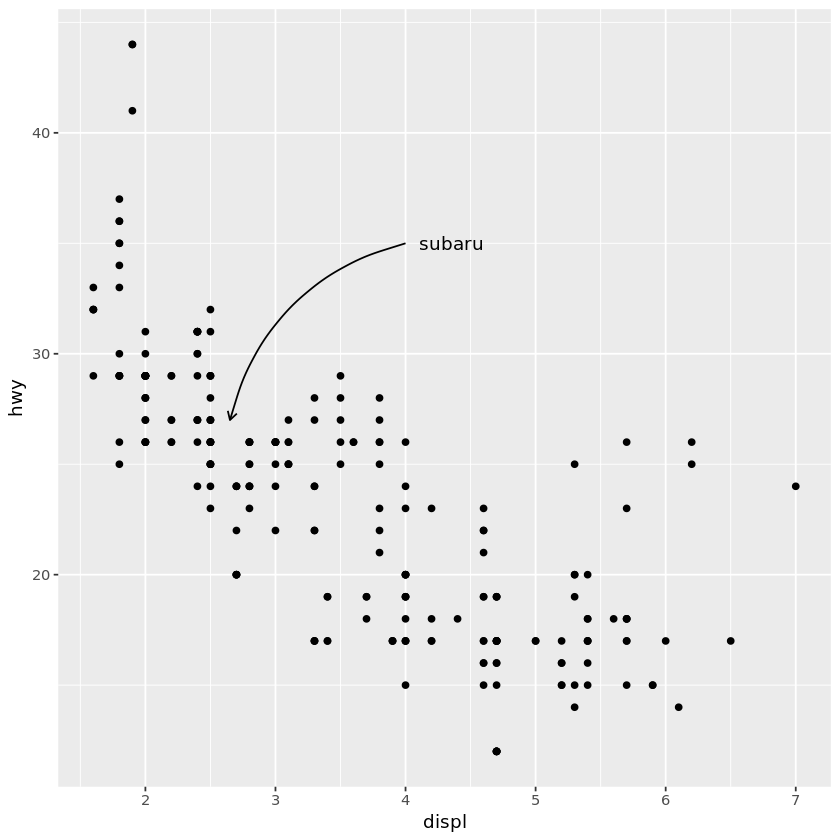

In [ ]:
p + 
  annotate(
    geom = "curve", x = 4, y = 35, xend = 2.65, yend = 27, 
    curvature = .3, arrow = arrow(length = unit(2, "mm"))
  ) +
  annotate(geom = "text", x = 4.1, y = 35, label = "subaru", hjust = "left")

ERROR: Error in loadNamespace(x): there is no package called ‘directlabels’


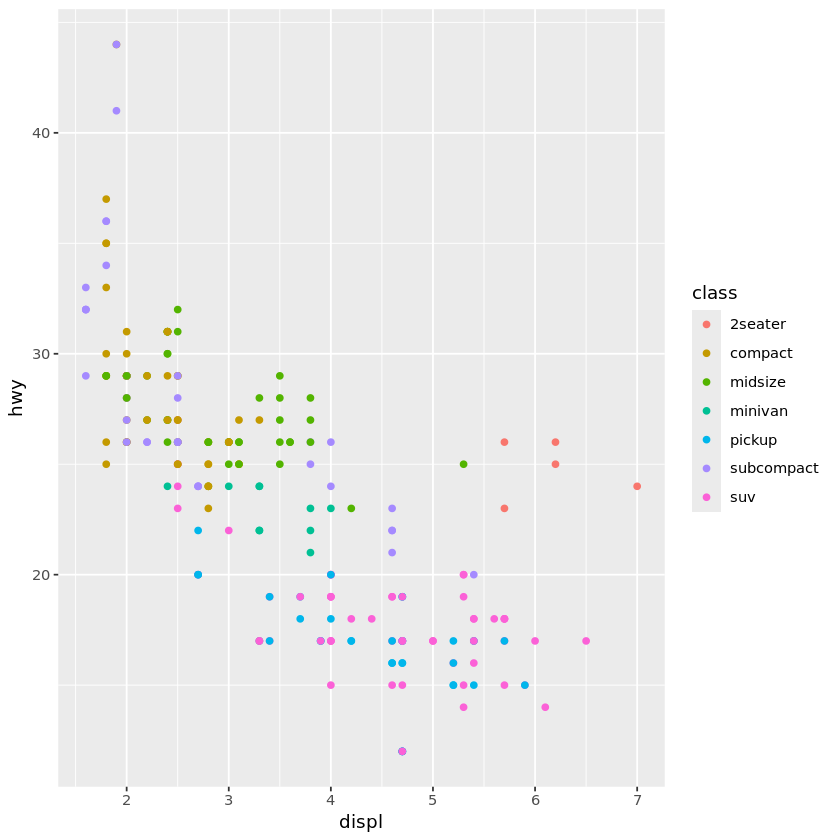

In [ ]:
ggplot(mpg, aes(displ, hwy, colour = class)) + 
  geom_point()

ggplot(mpg, aes(displ, hwy, colour = class)) + 
  geom_point(show.legend = FALSE) +
  directlabels::geom_dl(aes(label = class), method = "smart.grid")